In [84]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

In [85]:
# Load all data
τ2 = np.loadtxt("./data/0.300000_0.750000_5.000000_samples0.dat")

In [86]:
def P(τ,a,b,c):
    Z = 1.0 - np.exp(-c*(b-a))
    return (1/Z)*c*np.exp(-c*(τ-a));

def P_times_tau(τ,a,b,c):
    Z = 1.0 - np.exp(-c*(b-a))
    return τ*(1/Z)*c*np.exp(-c*(τ-a));

In [87]:
a,b,c = 0.3,0.75,5

In [88]:
τ_fit = np.linspace(a,b,1000)

### Rejection sampling $\tau$ from simple exponential distribution

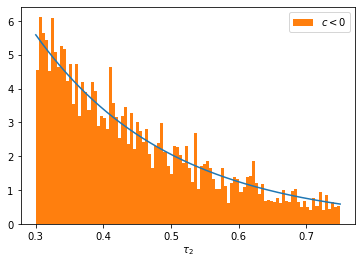

In [89]:
plt.plot(τ_fit,P(τ_fit,a,b,c))
plt.hist(τ2, density=True, bins=100,label=r'$c<0$');  # density=False would make counts
plt.xlabel(r'$\tau_2$');
plt.legend();

In [90]:
# Check normalization
integrate.quad(P,a,b,args=(a,b,c))

(0.9999999999999999, 1.1102230246251564e-14)

In [91]:
# Compute average time from histogram
τ2_counts, τ2_edges = np.histogram(τ2,bins=1000)
τ2_probs = np.divide(τ2_counts,np.sum(τ2_counts))

τ_mean_rejection = np.sum(τ2_probs*τ2_edges[:-1])
print("Average sampled time with rejection: ",τ_mean_rejection)

Average sampled time with rejection:  0.4425782715163813


### Direct sampling $\tau$ from simple exponential distribution

In [92]:
# Load all data
τ2_direct = np.loadtxt("./data/0.300000_0.750000_5.000000_samples1.dat")

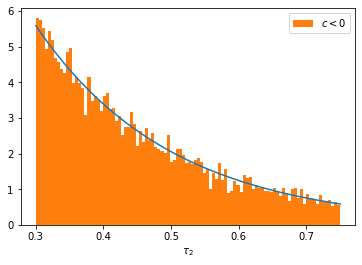

In [93]:
plt.plot(τ_fit,P(τ_fit,a,b,c))
plt.hist(τ2_direct, density=True, bins=100,label=r'$c<0$');  # density=False would make counts
plt.xlabel(r'$\tau_2$');
plt.legend();

In [94]:
# Compute average time from histogram
τ2_counts, τ2_edges = np.histogram(τ2_direct,bins=1000)
τ2_probs = np.divide(τ2_counts,np.sum(τ2_counts))

τ_mean_direct = np.sum(τ2_probs*τ2_edges[:-1])
print("Average sampled time with direct: ",np.sum(τ2_probs*τ2_edges[:-1]))

Average sampled time with direct:  0.44606091958981525


In [95]:
# Compute "exact" average of time
τ_mean_exact = integrate.quad(P_times_tau,a,b,args=(a,b,c))
τ_mean_exact

(0.4469823273631637, 4.962500714391235e-15)

In [96]:
rejection_error = np.abs((τ_mean_exact - τ_mean_rejection) / τ_mean_exact)[0]
direct_error = np.abs((τ_mean_exact - τ_mean_direct) / τ_mean_exact)[0]

In [97]:
print("Rejection Error: %.4f"%(rejection_error))
print("Direct Error: %.4f"%(direct_error))

Rejection Error: 0.0099
Direct Error: 0.0021


# Autocorrelation time comparison

### $\tau_1$ & $\tau_2$ sampling for $c>0$

In [ ]:
plt.hist(τ1_cpos, density=True, bins=30,label=r'$c>0$');  # density=False would make counts
plt.xlabel(r'$\tau_1$');
plt.legend();

In [ ]:
plt.hist(τ2_cpos, density=True, bins=30,label=r'$c>0$');  # density=False would make counts
plt.xlabel(r'$\tau_2$');
plt.legend();

### $\tau_1 | \tau_2$ heatmap

In [ ]:
plt.hist2d(τ1_cneg,τ2_cneg,density=True,bins=30)
plt.colorbar()
plt.xlabel(r"$\tau_1$")
plt.ylabel(r"$\tau_2$");
plt.title(r"$c<0$");
plt.savefig("0.100000_1.300000_-0.500000_sampled.pdf",dpi=400)

In [ ]:
plt.hist2d(τ1_cpos,τ2_cpos,density=True,bins=30)
plt.colorbar()
plt.xlabel(r"$\tau_1$")
plt.ylabel(r"$\tau_2$");
plt.title(r"$c>0$");
plt.savefig("0.100000_1.300000_0.500000_sampled.pdf",dpi=400)

In [ ]:
def _W(τ1,τ2,a,b,c):
    Z = (np.exp(c*(b-a))+a*c-b*c-1)/c**2
    if (τ2<τ1): 
        return 0
    else:
        return np.exp(c*(τ2-τ1))/Z

# Vectorize function so it's "numpy aware"
W = np.vectorize(_W)

### Compute exact 2D Distribution

In [ ]:
# Set a,b,c (should match file name)
a = 0.1
b = 1.3
c = 0.5

_τ1,_τ2 = np.linspace(a,b,30),np.linspace(a,b,30)

# Create meshgrid
τ1,τ2 = np.meshgrid(_τ1,_τ2)

In [ ]:
W_cneg = W(τ1,τ2,a,b,-c);

In [ ]:
# Plot
plt.imshow(W_cneg,origin='lower',extent=[a,b,a,b]);
plt.xlabel(r'$\tau_1$')
plt.ylabel(r'$\tau_2$')
plt.colorbar();
plt.title(r'$c<0$');
plt.savefig("0.100000_1.300000_0.-500000_exact.pdf",dpi=400)

In [ ]:
W_cpos = W(τ1,τ2,a,b,c);

In [ ]:
# Plot
plt.imshow(W_cpos,origin='lower',extent=[a,b,a,b]);
plt.xlabel(r'$\tau_1$')
plt.ylabel(r'$\tau_2$')
plt.colorbar();
plt.title(r'$c>0$');
plt.savefig("0.100000_1.300000_0.500000_exact.pdf",dpi=400)

### Compute relative errors

In [ ]:
W_cneg.shape

In [ ]:
x_bins = np.linspace(a,b,31)
y_bins = np.linspace(a,b,31)
H = np.histogram2d(τ1_cneg, τ2_cneg, bins=(x_bins, y_bins),density=True)
H_cneg = H[0].T

In [ ]:
# Plot
# relErr_cneg = np.nan_to_num(np.abs(W_cneg-H_cneg)/W_cneg);
relErr_cneg = np.nan_to_num((W_cneg-H_cneg)/W_cneg);
plt.imshow(relErr_cneg,origin='lower',extent=[a,b,a,b]);
plt.xlabel(r'$\tau_1$')
plt.ylabel(r'$\tau_2$')
plt.colorbar();
plt.title(r'$c<0$');
# plt.savefig("0.100000_1.300000_-0.500000_relativeError.pdf",dpi=400)

In [6]:
relErr_cneg = np.ma.masked_array(relErr_cneg,mask=relErr_cneg==np.diag(relErr_cneg))
plt.imshow((relErr_cneg),origin='lower',extent=[a,b,a,b]);
plt.xlabel(r'$\tau_1$')
plt.ylabel(r'$\tau_2$')
plt.colorbar();
plt.title(r'$c<0$');
plt.savefig("0.100000_1.300000_-0.500000_relativeError_masked_noAbs.pdf",dpi=400)

NameError: name 'relErr_cneg' is not defined

In [ ]:
x = np.array([1,1,1])
y = np.array([1,1,0])
x == y

Now for $c>0$

In [ ]:
H = np.histogram2d(τ1_cpos, τ2_cpos, bins=(x_bins, y_bins),density=True)
H_cpos = H[0].T

In [ ]:
_noAbs# Plot
relErr_cpos = np.nan_to_num((W_cpos-H_cpos)/W_cpos)
relErr_cpos = np.ma.masked_array((relErr_cpos),mask=relErr_cpos==np.diag(relErr_cpos))
plt.imshow(relErr_cpos,origin='lower',extent=[a,b,a,b]);
plt.xlabel(r'$\tau_1$')
plt.ylabel(r'$\tau_2$')
plt.colorbar();
plt.title(r'$c>0$');
plt.savefig("0.100000_1.300000_0.500000_relativeError_masked_noAbs.pdf",dpi=400)